#### Fetching complete Dataset 

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [6]:
import os
import platform
import sys

In [7]:
#  Setting Path to Dataset
def check_if_colab():
    if 'google.colab' in sys.modules:
        return True
    return False

In [8]:
if check_if_colab():
    print("Running on Google Colab")
    # from google.colab import drive
    # drive.mount('/content/drive')
    # BASE_PATH_TO_DATASETS='/content/drive/MyDrive/OMSCS/cs7641/All assignments/Assignments/Assignment-1'
    # BASE_PATH_TO_DATASETS=os.path.join(BASE_PATH_TO_DATASETS,'pubg')
else:
  if platform.system().lower().__contains__('windows'):
      BASE_PATH_TO_PROJECT_REPOSITORY=(os.sep).join(os.getcwd().split(os.sep)[:os.getcwd().split(os.sep).index('Parsec_Assignment')+1])
      BASE_PATH_TO_DATASETS=os.path.join(BASE_PATH_TO_PROJECT_REPOSITORY,'dataset')
      BASE_PATH_TO_CODE_BASE =os.path.join(BASE_PATH_TO_DATASETS, 'code_base')

  elif platform.system().lower().__contains__('linux'):
      BASE_PATH_TO_PROJECT_REPOSITORY=(os.sep).join(os.getcwd().split(os.sep)[:os.getcwd().split(os.sep).index('Parsec_Assignment')+1])
      BASE_PATH_TO_DATASETS=os.path.join(BASE_PATH_TO_PROJECT_REPOSITORY,'dataset')
      BASE_PATH_TO_CODE_BASE=os.path.join(BASE_PATH_TO_PROJECT_REPOSITORY, 'code_base')
  else:
      print('OS Error')
os.listdir(BASE_PATH_TO_DATASETS)

['DataSet.xlsx', 'modified_dataset.xlsx', 'modified_dataset_v1.xlsx']

In [9]:
PATH_TO_DATATSET_XLSX=os.path.join(BASE_PATH_TO_DATASETS, 'DataSet.xlsx')
PATH_TO_DATATSET_XLSX

'/media/vchopra/DATA/Complete Technical Work/All  Projects Implemented/Small Projects/Artificial Intelligence Projects/Code Base/Natural_Language_Processing_Projects/Parsec_Assignment/dataset/DataSet.xlsx'

In [12]:
df=pd.read_excel(PATH_TO_DATATSET_XLSX)
df.tail()

,datasheet_link,target_col
2565,https://www.memoryprotectiondevices.com/datash...,others
2566,https://www.memoryprotectiondevices.com/datash...,others
2567,https://www.memoryprotectiondevices.com/datash...,others
2568,http://www.switchcomp.com/switchcomp_ecommerce...,others
2569,http://www.switchcomp.com/switchcomp_ecommerce...,others


#### Basic Distribution Plot

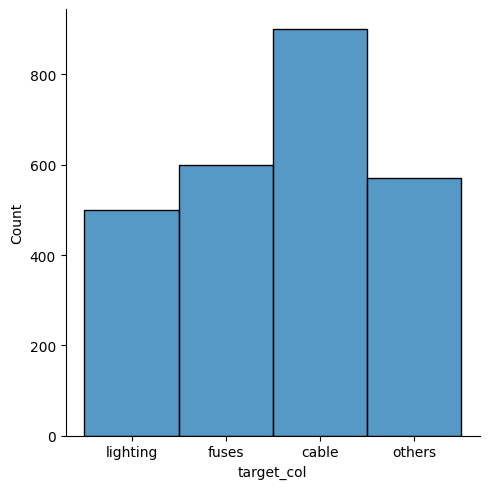

In [13]:
sns.displot(df['target_col'])

### Fixing a few URL's

In [14]:
import re
import requests
from urllib.parse import urlparse

In [15]:
def fix_digikey_url(url: str) -> str:
    """Add https:// prefix to digikey URLs if missing"""
    if url.startswith("//mm.digikey"):
        return f"http:{url}"
    return url

In [16]:
url = "//mm.digikey.com/Volume0/opasdata/d220001/medias/docus/665/1704853.pdf"
fixed_url = fix_digikey_url(url)
fixed_url

'http://mm.digikey.com/Volume0/opasdata/d220001/medias/docus/665/1704853.pdf'

In [18]:
df['fixed_url'] = df['datasheet_link'].apply(fix_digikey_url)
df

,datasheet_link,target_col,fixed_url
0,https://lfillumination.com/files/specsheets/EF...,lighting,https://lfillumination.com/files/specsheets/EF...
1,https://lfillumination.com/files/specsheets/EF...,lighting,https://lfillumination.com/files/specsheets/EF...
2,https://lfillumination.com/files/specsheets/EF...,lighting,https://lfillumination.com/files/specsheets/EF...
3,https://www.waclighting.com/storage/waclightin...,lighting,https://www.waclighting.com/storage/waclightin...
4,https://www.acuitybrands.com/api/products/geta...,lighting,https://www.acuitybrands.com/api/products/geta...
...,...,...,...
2565,https://www.memoryprotectiondevices.com/datash...,others,https://www.memoryprotectiondevices.com/datash...
2566,https://www.memoryprotectiondevices.com/datash...,others,https://www.memoryprotectiondevices.com/datash...
2567,https://www.memoryprotectiondevices.com/datash...,others,https://www.memoryprotectiondevices.com/datash...
2568,http://www.switchcomp.com/switchcomp_ecommerce...,others,http://www.switchcomp.com/switchcomp_ecommerce...


In [20]:
df.to_excel(os.path.join(BASE_PATH_TO_DATASETS, 'modified_dataset_v2.xlsx'), index=False)

###   Creating Dataset

In [ ]:
# for i in range(0,len(df)):
#     if df['fixed_url'].iloc[i]=='-':
#         print(i)
#     else:
#         continue

In [1]:
import time
import requests
import io
import pymupdf as fitz  # PyMuPDF
import pytesseract
from pdf2image import convert_from_bytes
from PIL import Image
import time

In [2]:
# Mimic browser headers
HEADERS = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/119.0.0.0 Safari/537.36",
    "Referer": "https://www.google.com",
    "Accept": "application/pdf",
    "Accept-Language": "en-US,en;q=0.9",
    "Cache-Control": "no-cache",
    "Connection": "keep-alive"
}

In [3]:
# def fetch_pdf(url, timeout=20):
#     """Fetch PDF content from a URL, mimicking a browser request."""
#     start_time = time.time()
    
#     try:
#         response = requests.get(url, headers=HEADERS, timeout=timeout)
#         response.raise_for_status()  # Raise HTTP errors directly
        
#         total_time = time.time() - start_time
#         return response.content, response.status_code, total_time
    
#     except requests.exceptions.Timeout:
#         return f"Timeout: Could not retrieve PDF from {url}", 408, 0
#     except requests.exceptions.RequestException as e:
#         return f"Error downloading PDF: {str(e)}", 500, 0
    

def fetch_pdf(url, timeout=20):
    start_time = time.time()
    
    try:
        response = requests.get(url, headers=HEADERS, timeout=timeout)
        response.raise_for_status()  # Raise error for HTTP codes like 403, 404
        
        total_time = time.time() - start_time
        
        # Log if response is not PDF
        if response.content[:4] != b'%PDF':
            with open("debug_response.html", "wb") as f:
                f.write(response.content)
            return "Invalid PDF. HTML or different content returned.", 415, total_time
        
        return response.content, response.status_code, total_time
    
    except requests.exceptions.Timeout:
        return f"Timeout: Could not retrieve PDF from {url}", 408, 0
    except requests.exceptions.RequestException as e:
        return f"Error downloading PDF: {str(e)}", 500, 0



In [4]:

def is_valid_pdf(pdf_bytes):
    return pdf_bytes[:4] == b'%PDF'

def perform_ocr(pdf_bytes):
    """Perform OCR on a scanned PDF (fallback)."""
    images = convert_from_bytes(pdf_bytes)
    text = ""
    for img in images:
        text += pytesseract.image_to_string(img)
    
    return text.strip() if text else "OCR could not extract text."

In [5]:
def extract_text_from_pdf(pdf_bytes):
    if not is_valid_pdf(pdf_bytes):
        return "Invalid PDF or HTML returned instead of PDF."

    pdf_file = io.BytesIO(pdf_bytes)
    
    try:
        doc = fitz.open(stream=pdf_file, filetype="pdf")
    except Exception as e:
        return f"Failed to open PDF: {str(e)}"
    
    text = ""
    for page in doc:
        page_text = page.get_text("text")
        if not page_text.strip():  # If no text, fallback to OCR
            return perform_ocr(pdf_bytes)
        text += page_text
    
    return text.strip() if text else "No extractable text found."

In [6]:

def read_pdf_from_url(url):
    """Unified function to read PDF content from a URL."""
    if url == '-':
        return "No URL provided", 400, 0
    
    pdf_bytes, status_code, total_time = fetch_pdf(url)
    
    if isinstance(pdf_bytes, str):
        return pdf_bytes, status_code, total_time  # Return errors directly
    
    extracted_text = extract_text_from_pdf(pdf_bytes)
    
    return extracted_text, status_code, total_time

In [108]:
# Select 5 samples from the dataframe
sample_df = df.sample(1)
# sample_df=df.iloc[[1839]]
# sample_df = pd.DataFrame(df.iloc[1839], columns=df.columns)
sample_df[['fixed_url', 'target_col']]

,fixed_url,target_col
2387,https://www.alphawire.com/products/cable/alpha...,cable


In [109]:
sample_results= read_pdf_from_url(sample_df['fixed_url'].iloc[0])
# sample_results=(sample_df['fixed_url'].apply(read_pdf_from_url))
print(sample_results, type(sample_results))

('Invalid PDF. HTML or different content returned.', 415, 3.4250218868255615) <class 'tuple'>


In [110]:
sample_df.loc[sample_df.index[0], 'pdf_text_sample'] = sample_results[0]
sample_df.loc[sample_df.index[0], 'link_status_code'] = sample_results[1]
sample_df.loc[sample_df.index[0], 'link_time_taken'] = sample_results[2]

sample_df[['datasheet_link', 'pdf_text_sample', 'link_status_code', 'link_time_taken']]

,datasheet_link,pdf_text_sample,link_status_code,link_time_taken
2387,https://www.alphawire.com/products/cable/alpha...,Invalid PDF. HTML or different content returned.,415.0,3.425022


#### Completing for all PDF

In [ ]:
# from tqdm import tqdm
# tqdm.pandas()
# df['pdf_text'] = df['fixed_url'].progress_apply(read_pdf_from_url)
# df.head()

In [111]:
import multiprocessing
from tqdm import tqdm
tqdm.pandas()

def multiprocess_read(df, url_column='fixed_url'):
    """Use multiple processes + tqdm to apply read_pdf_from_url."""
    with multiprocessing.Pool() as pool:
        results = list(tqdm(pool.imap(read_pdf_from_url, df[url_column]), total=len(df)))
    
    # Unpack results (list of (text, status_code)) into separate columns
    pdf_text_sample, link_status_code, link_time_taken = zip(*results)
    df['pdf_text_sample'] = pdf_text_sample
    df['link_status_code'] = link_status_code
    df['link_time_taken'] = link_time_taken
    
    return df

In [113]:
dataset = multiprocess_read(df, 'fixed_url')
print(dataset[['datasheet_link','pdf_text_sample','link_status_code']])

100%|██████████| 2570/2570 [12:17<00:00,  3.48it/s] 

                                         datasheet_link  \
0     https://lfillumination.com/files/specsheets/EF...   
1     https://lfillumination.com/files/specsheets/EF...   
2     https://lfillumination.com/files/specsheets/EF...   
3     https://www.waclighting.com/storage/waclightin...   
4     https://www.acuitybrands.com/api/products/geta...   
...                                                 ...   
2565  https://www.memoryprotectiondevices.com/datash...   
2566  https://www.memoryprotectiondevices.com/datash...   
2567  https://www.memoryprotectiondevices.com/datash...   
2568  http://www.switchcomp.com/switchcomp_ecommerce...   
2569  http://www.switchcomp.com/switchcomp_ecommerce...   

                                        pdf_text_sample  link_status_code  
0     EF400 System # EF408B\nDIE CAST CYLINDRICAL LI...               200  
1     Error downloading PDF: 404 Client Error: Not F...               500  
2     EF400 System # EF407B\nDIE CAST CYLINDRICAL LI...        

In [119]:
dataset['link_status_code'].value_counts()

link_status_code
200    1744
415     493
500     200
408      71
400      62
Name: count, dtype: int64

In [135]:
dataset[dataset['link_status_code']==408].head()

,datasheet_link,target_col,fixed_url,pdf_text_sample,link_status_code,link_time_taken
576,https://www.eaton.com/content/dam/eaton/produc...,fuses,https://www.eaton.com/content/dam/eaton/produc...,Timeout: Could not retrieve PDF from https://w...,408,0.0
583,https://www.eaton.com/content/dam/eaton/produc...,fuses,https://www.eaton.com/content/dam/eaton/produc...,Timeout: Could not retrieve PDF from https://w...,408,0.0
606,https://www.eaton.com/content/dam/eaton/produc...,fuses,https://www.eaton.com/content/dam/eaton/produc...,Timeout: Could not retrieve PDF from https://w...,408,0.0
662,https://www.eaton.com/content/dam/eaton/produc...,fuses,https://www.eaton.com/content/dam/eaton/produc...,Timeout: Could not retrieve PDF from https://w...,408,0.0
665,https://www.eaton.com/content/dam/eaton/produc...,fuses,https://www.eaton.com/content/dam/eaton/produc...,Timeout: Could not retrieve PDF from https://w...,408,0.0


In [ ]:
dataset[dataset['link_status_code']==408].iloc[1]['fixed_url']

'-'

In [136]:
subset_df=dataset[dataset['link_status_code']==408]

In [138]:
# subset_dataset = multiprocess_read(subset_df, 'fixed_url')
# print(subset_dataset[['datasheet_link','pdf_text_sample','link_status_code']])

In [139]:
final_df=dataset[dataset['link_status_code']==200]

In [140]:
final_df.to_csv(os.path.join(BASE_PATH_TO_DATASETS, 'modified_dataset_v3.xlsx'), index=False)